## Modelo 02

Como parte del bootcamp de Henry de Data Science se realiza un modelo para predecir el número de bicicletas.

### Exploración de datos

El objetivo de la primera parte del notebook es realizar una exploración de los datos del Dataset bike_train.xlsx

1. Cargamos las librerías y los datos

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [51]:
bike_train = pd.read_excel('bike_train.xlsx', index_col = 0)
bike_test = pd.read_excel('bike_test.xlsx', index_col = 0)
bike_train.head(5)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [52]:
drop_columns = ['dteday', 'casual', 'registered']
train = bike_train.drop(drop_columns, axis =1)
test = bike_test.drop(['dteday'], axis =1)
train.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,,
1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [53]:
corrmat = train.corr()
corrmat

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.446665,0.865268,-0.007610,-0.008928,-0.003688,0.012630,-0.009029,0.410790,0.413196,0.198937,-0.142924,0.111369
yr,-0.446665,1.000000,-0.488103,-0.003948,0.001039,-0.002714,0.001068,-0.006309,-0.198929,-0.190360,-0.141319,0.067356,0.156960
mnth,0.865268,-0.488103,1.000000,-0.007060,0.009372,0.014500,0.006441,-0.012239,0.353330,0.358541,0.201669,-0.147042,0.073431
hr,-0.007610,-0.003948,-0.007060,1.000000,0.000414,-0.004037,0.003454,-0.024003,0.139251,0.134633,-0.257202,0.130441,0.396698
holiday,-0.008928,0.001039,0.009372,0.000414,1.000000,-0.102503,-0.248601,-0.014707,-0.028519,-0.038005,-0.036672,0.022681,-0.030304
weekday,-0.003688,-0.002714,0.014500,-0.004037,-0.102503,1.000000,0.031057,0.017259,-0.010002,-0.009841,-0.025932,0.008447,0.022618
workingday,0.012630,0.001068,0.006441,0.003454,-0.248601,0.031057,1.000000,0.042202,0.062273,0.066305,0.022805,-0.002493,0.025132
weathersit,-0.009029,-0.006309,-0.012239,-0.024003,-0.014707,0.017259,0.042202,1.000000,-0.080149,-0.081386,0.430378,0.009195,-0.149848
temp,0.410790,-0.198929,0.353330,0.139251,-0.028519,-0.010002,0.062273,-0.080149,1.000000,0.991785,-0.019289,-0.013984,0.395743
atemp,0.413196,-0.190360,0.358541,0.134633,-0.038005,-0.009841,0.066305,-0.081386,0.991785,1.000000,-0.003669,-0.057619,0.395234


In [54]:
pd.plotting.scatter_matrix(train[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp','hum', 'windspeed', 'cnt']],figsize = (15,10))
plt.show()

KeyboardInterrupt: 

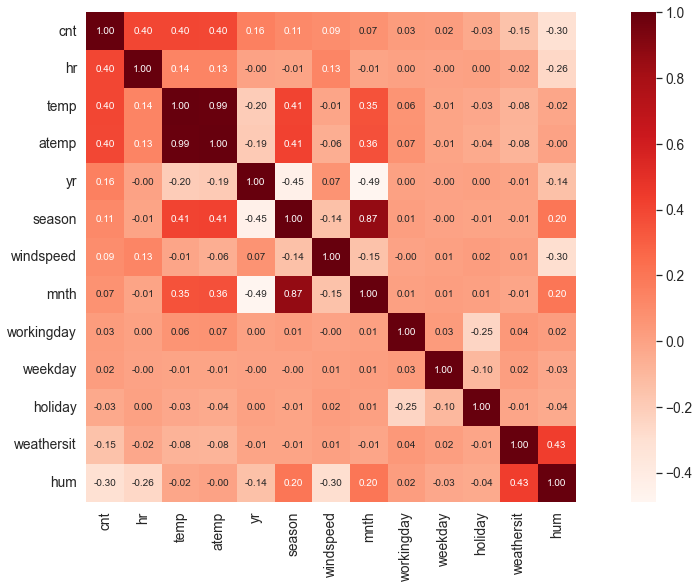

In [9]:
plt.figure(figsize=(20, 9))
k=13
cols = corrmat.nlargest(k, 'cnt')['cnt'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values,cmap="Reds")
plt.show()

In [55]:
train_target = train['cnt']

train_feature = train.drop(['season', 'yr','holiday', 'weekday', 'workingday', 'windspeed', 'cnt'], axis=1)
train_target.shape, train_feature.shape

((11999,), (11999, 6))

In [95]:
train_target.astype('float32')

instant
1         16.0
2         40.0
3         32.0
4         13.0
5          1.0
         ...  
11995    239.0
11996    170.0
11997    130.0
11998     98.0
11999     66.0
Name: cnt, Length: 11999, dtype: float32

In [79]:
test_feature = test.drop(['season', 'yr','holiday', 'weekday', 'workingday', 'windspeed'], axis=1)

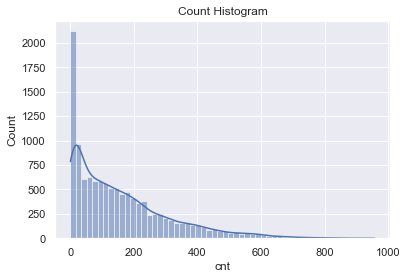

In [57]:
plt.title('Count Histogram')
sns.histplot(train_target, kde=True)
plt.show()

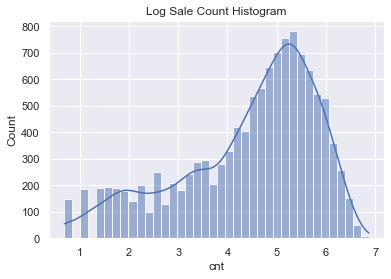

In [58]:
plt.title('Log Sale Count Histogram')
train_target_log = np.log1p(train_target)

sns.histplot(train_target_log, kde=True)
plt.show()

In [59]:
train_target_log.describe()

count    11999.000000
mean         4.408974
std          1.402305
min          0.693147
25%          3.555348
50%          4.779123
75%          5.451038
max          6.864848
Name: cnt, dtype: float64

In [136]:
# One Hot Encoding 
train_featute_ohe = pd.get_dummies(train_feature, columns=['weathersit', 'mnth', 'hr'])
test_featute_ohe = pd.get_dummies(test_feature, columns=['weathersit', 'mnth', 'hr'])
train_featute_ohe.shape


(11999, 43)

In [137]:

train_featute_ohe.columns 

Index(['temp', 'atemp', 'hum', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [142]:
test_featute_ohe.columns

Index(['temp', 'atemp', 'hum', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [141]:
test_featute_ohe.insert(6, 'weathersit_4',0)


In [139]:
test_featute_ohe.insert(6, 'mnth_1', 0)
test_featute_ohe.insert(7, 'mnth_2', 0)
test_featute_ohe.insert(8, 'mnth_3', 0)
test_featute_ohe.insert(9, 'mnth_4', 0)


In [143]:
test_featute_ohe.columns

Index(['temp', 'atemp', 'hum', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16',
       'hr_17', 'hr_18', 'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

In [144]:
train_featute_ohe = pd.get_dummies(train_feature, columns=['weathersit', 'mnth', 'hr'])
train_featute_ohe.shape

(11999, 43)

In [145]:
train_featute_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 1 to 11999
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   temp          11999 non-null  float64
 1   atemp         11999 non-null  float64
 2   hum           11999 non-null  float64
 3   weathersit_1  11999 non-null  uint8  
 4   weathersit_2  11999 non-null  uint8  
 5   weathersit_3  11999 non-null  uint8  
 6   weathersit_4  11999 non-null  uint8  
 7   mnth_1        11999 non-null  uint8  
 8   mnth_2        11999 non-null  uint8  
 9   mnth_3        11999 non-null  uint8  
 10  mnth_4        11999 non-null  uint8  
 11  mnth_5        11999 non-null  uint8  
 12  mnth_6        11999 non-null  uint8  
 13  mnth_7        11999 non-null  uint8  
 14  mnth_8        11999 non-null  uint8  
 15  mnth_9        11999 non-null  uint8  
 16  mnth_10       11999 non-null  uint8  
 17  mnth_11       11999 non-null  uint8  
 18  mnth_12       11999 non-nu

In [146]:
test_featute_ohe.columns.shape

(43,)

In [147]:
from sklearn.model_selection import train_test_split 

X_train, X_validation, y_train, y_validation = train_test_split(train_featute_ohe, train_target, test_size=0.2, random_state=42)


In [148]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [149]:
def rmse(y_true, y_pred):
    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [170]:
tf.random.set_seed(42)

model = Sequential([
    Dense(200, activation='tanh', use_bias=True),
    Dense(200, activation='relu', use_bias=True),
    Dense(1)
])


model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=['binary_accuracy']
)

model.fit(X_train, y_train, epochs=200)

Epoch 1/200
300/300 [==============================] - 1s 2ms/step - loss: 20037.1230 - binary_accuracy: 0.0086
Epoch 2/200
300/300 [==============================] - 0s 2ms/step - loss: 8182.6733 - binary_accuracy: 0.0108
Epoch 3/200
300/300 [==============================] - 0s 1ms/step - loss: 7911.0063 - binary_accuracy: 0.0104
Epoch 4/200
300/300 [==============================] - 0s 2ms/step - loss: 7748.3521 - binary_accuracy: 0.0075
Epoch 5/200
300/300 [==============================] - 0s 1ms/step - loss: 7690.5229 - binary_accuracy: 0.0070
Epoch 6/200
300/300 [==============================] - 0s 2ms/step - loss: 7627.0010 - binary_accuracy: 0.0065
Epoch 7/200
300/300 [==============================] - 0s 1ms/step - loss: 7556.6353 - binary_accuracy: 0.0061
Epoch 8/200
300/300 [==============================] - 0s 2ms/step - loss: 7503.5269 - binary_accuracy: 0.0059
Epoch 9/200
300/300 [==============================] - 1s 2ms/step - loss: 7481.6704 - binary_accuracy: 0.0057


In [161]:
predictions = model.predict(X_validation)

75/75 [==============================] - 0s 1ms/step


In [152]:
predictions = np.round(predictions, 0)

In [162]:
predictions

array([[107.2869  ],
       [  9.082112],
       [450.62482 ],
       ...,
       [246.4352  ],
       [287.49316 ],
       [303.878   ]], dtype=float32)

In [163]:
rmse(y_validation[1], predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=197.24902>

In [166]:
pred = model.predict(test_featute_ohe)


169/169 [==============================] - 0s 1ms/step


In [167]:
pred[0:10]

array([[  6.445529],
       [ 24.519295],
       [108.54354 ],
       [263.42953 ],
       [377.4894  ],
       [291.1555  ],
       [261.4621  ],
       [407.23566 ],
       [463.98248 ],
       [493.32855 ]], dtype=float32)

In [165]:
predicted_count = np.round(pred, 0)
predicted_count[0:10]

array([[  6.],
       [ 25.],
       [109.],
       [263.],
       [377.],
       [291.],
       [261.],
       [407.],
       [464.],
       [493.]], dtype=float32)

In [168]:
pred = pd.DataFrame(predicted_count, columns = ['pred'])

In [169]:
pred.to_csv('TeffaHM.csv', header=True, index=False)